In [3]:
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [4]:
# a = pl.read_csv("housing_dataset.csv",ignore_errors=True, infer_schema_length=10000, dtypes={
# 	"Id": pl.Int32,
# 	"MSSubClass": pl.Int32,
# 	"MSZoning": pl.Utf8,
# 	"LotFrontage": pl.Int32,
# 	"LotArea": pl.Int32,
# 	"Street": pl.Utf8,
# 	"Alley": pl.Utf8,
# 	"LotShape": pl.Utf8,
# 	"LandContour": pl.Utf8,
# 	"Utilities": pl.Utf8,
# 	"LotConfig": pl.Utf8,
# 	"LandSlope": pl.Utf8,
# 	"Neighborhood": pl.Utf8,
# 	"Condition1": pl.Utf8,
# 	"Condition2": pl.Utf8,
# 	"BldgType": pl.Utf8,
# 	"HouseStyle": pl.Utf8,
# 	"OverallQual": pl.Int32,
# 	"OverallCond": pl.Int32,
# 	"YearBuilt": pl.Int32,
# 	"YearRemodAdd": pl.Int32,
# 	"RoofStyle": pl.Utf8,
# 	"RoofMatl": pl.Utf8,
# 	"Exterior1st": pl.Utf8,
# 	"Exterior2nd": pl.Utf8,
# 	"MasVnrType": pl.Utf8,
# 	"MasVnrArea": pl.Int32,
# 	"ExterQual": pl.Utf8,
# 	"ExterCond": pl.Utf8,
# 	"Foundation": pl.Utf8,
# 	"BsmtQual": pl.Utf8,
# 	"BsmtCond": pl.Utf8,
# 	"BsmtExposure": pl.Utf8,
# 	"BsmtFinType1": pl.Utf8,
# 	"BsmtFinSF1": pl.Int32,
# 	"BsmtFinType2": pl.Utf8,
# 	"BsmtFinSF2": pl.Int32,
# 	"BsmtUnfSF": pl.Int32,
# 	"TotalBsmtSF": pl.Int32,
# 	"Heating": pl.Utf8,
# 	"HeatingQC": pl.Utf8,
# 	"CentralAir": pl.Utf8,
# 	"Electrical": pl.Utf8,
# 	"1stFlrSF": pl.Int32,
# 	"2ndFlrSF": pl.Int32,
# 	"LowQualFinSF": pl.Int32,
# 	"GrLivArea": pl.Int32,
# 	"BsmtFullBath": pl.Int32,
# 	"BsmtHalfBath": pl.Int32,
# 	"FullBath": pl.Int32,
# 	"HalfBath": pl.Int32,
# 	"BedroomAbvGr": pl.Int32,
# 	"KitchenAbvGr": pl.Int32,
# 	"KitchenQual": pl.Utf8,
# 	"TotRmsAbvGrd": pl.Int32,
# 	"Functional": pl.Utf8,
# 	"Fireplaces": pl.Int32,
# 	"FireplaceQu": pl.Utf8,
# 	"GarageType": pl.Utf8,
# 	"GarageYrBlt": pl.Int32,
# 	"GarageFinish": pl.Utf8,
# 	"GarageCars": pl.Int32,
# 	"GarageArea": pl.Int32,
# 	"GarageQual": pl.Utf8,
# 	"GarageCond": pl.Utf8,
# 	"PavedDrive": pl.Utf8,
# 	"WoodDeckSF": pl.Int32,
# 	"OpenPorchSF": pl.Int32,
# 	"EnclosedPorch": pl.Int32,
# 	"3SsnPorch": pl.Int32,
# 	"ScreenPorch": pl.Int32,
# 	"PoolArea": pl.Int32,
# 	"PoolQC": pl.Utf8,
# 	"Fence": pl.Utf8,
# 	"MiscFeature": pl.Utf8,
# 	"MiscVal": pl.Int32,
# 	"MoSold": pl.Int32,
# 	"YrSold": pl.Int32,
# 	"SaleType": pl.Utf8,
# 	"SaleCondition": pl.Utf8,
# 	"SalePrice": pl.Int32 
# })

In [5]:
a = pd.read_csv("housing_dataset.csv")

In [6]:
a

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
a.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# profile = ProfileReport(a, title="Profiling Report")
# profile.to_widgets()
# profile.to_file("your_report.html")

# Feature Engineering

### Données manquantes?
	Solution simple : Enlever les lignes avec de la donnée manquante, ou encore la variable qui contient énormément de données manquantes
	Une meilleure option sera de faire une imputation de valeurs manquantes, plusieurs manières existent :
		remplacer par une valeur fixe, par la moyenne, ...
	Imputer la valeur manquante en se basant sur les valeurs d'une autre variables explicatives.
 	Les garder et utiliser des algorithmes qui peuvent être entrainés malgré les valeurs manquantes : KNN, Random Forest, ...




In [10]:
# remove lines with a lot of missing values

a = a.dropna(thresh=1000, axis=1)

In [11]:
a

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Distribution de la donnée?


In [12]:
# create an array with the column names
col = a.columns

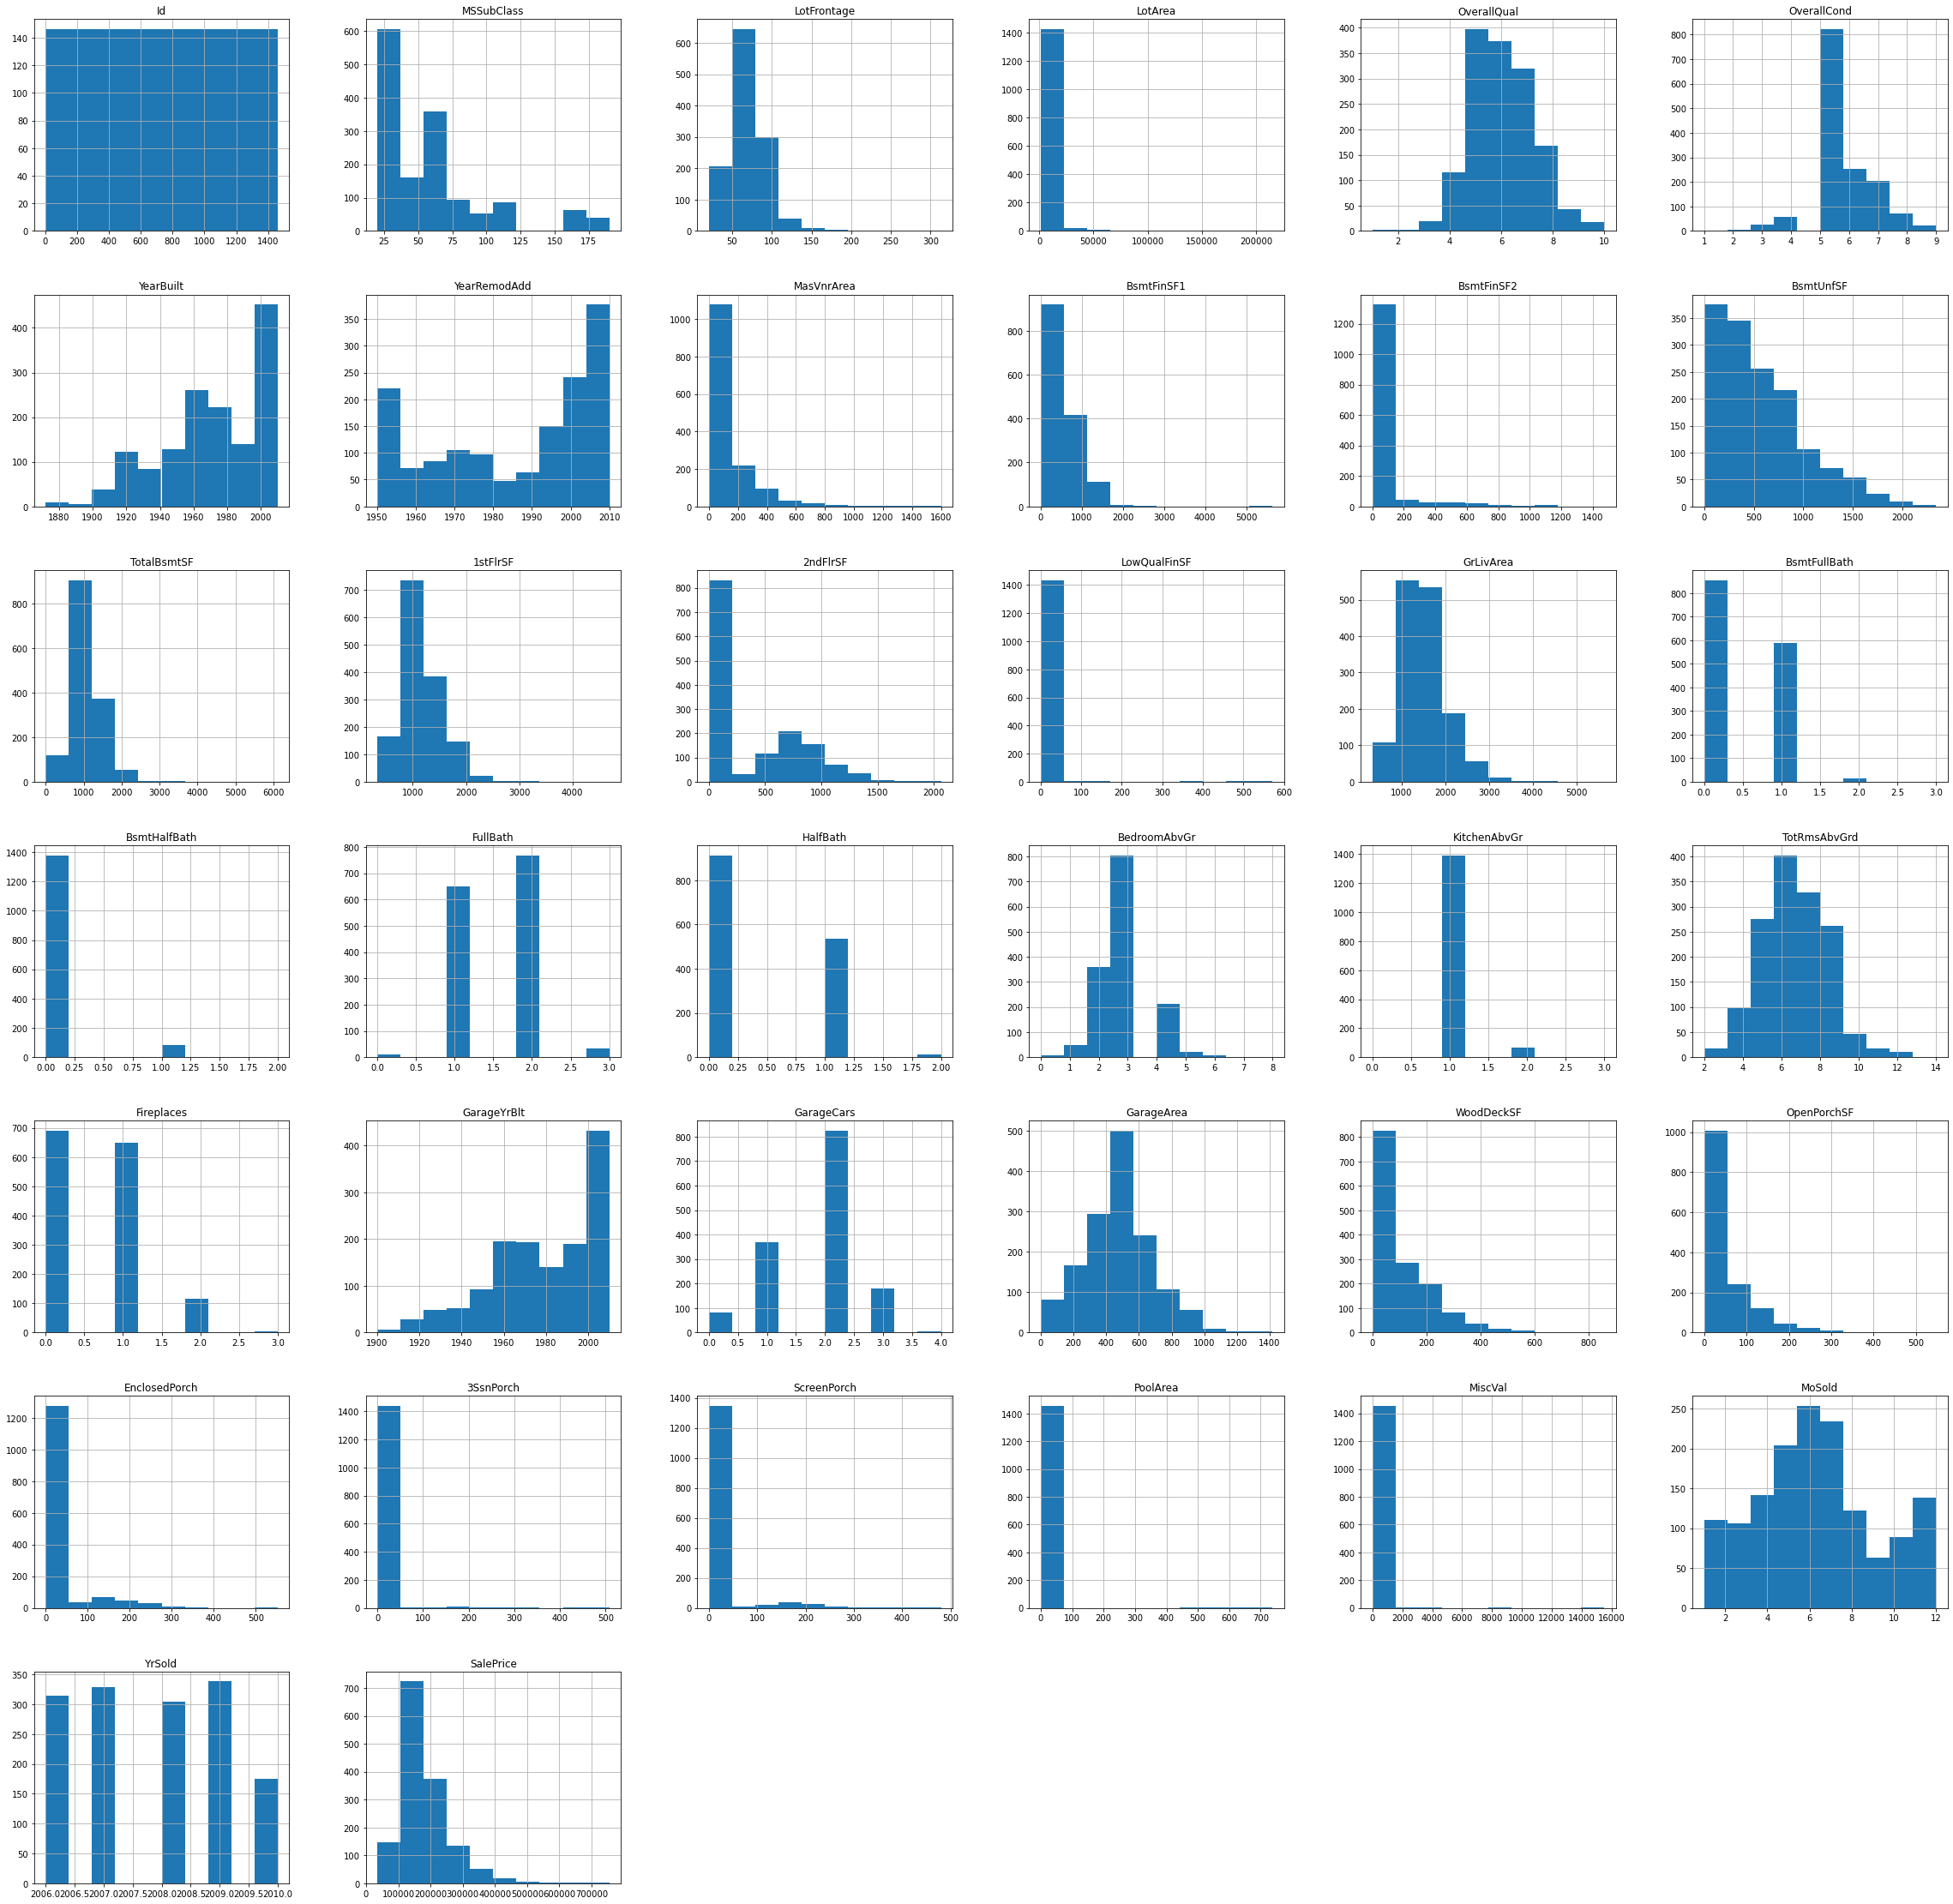

In [13]:
bar = a.hist(figsize=(40,40))


### Relation entre les variables ?


In [14]:
col = a.columns

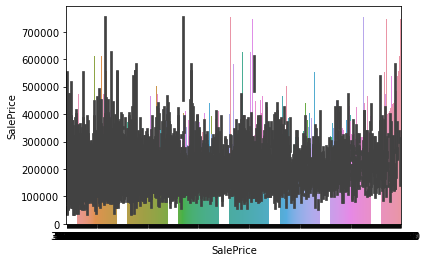

In [23]:
i = 0
for i in col:
    aaa = sns.barplot(data=a, x=i, y="SalePrice")
    aaa.figure.savefig("plots/"+i+".png")
    
    

<AxesSubplot:>

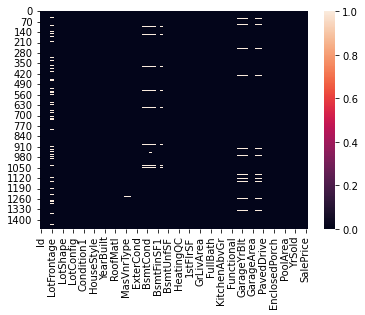

In [21]:
sns.heatmap(a.isna()) 

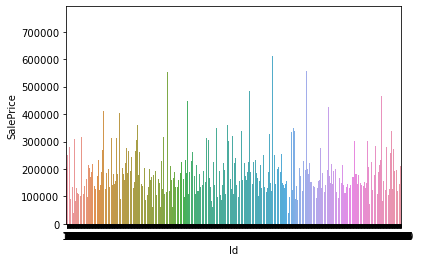

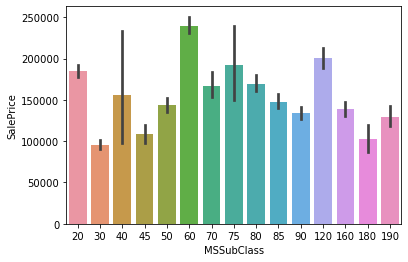

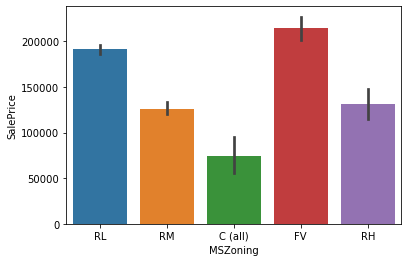

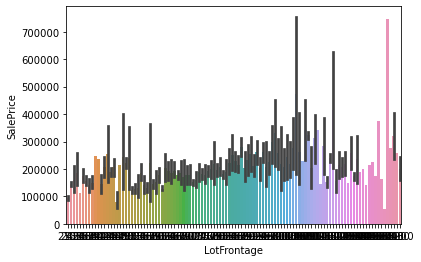

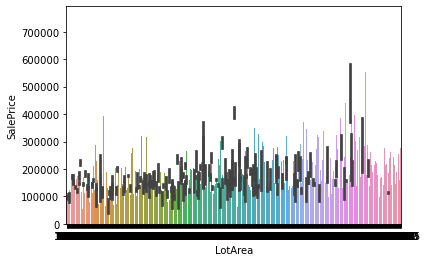

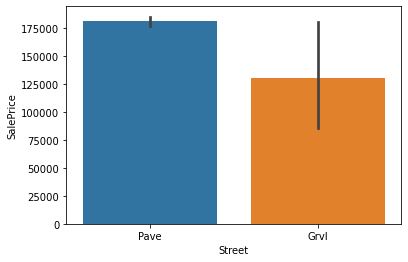

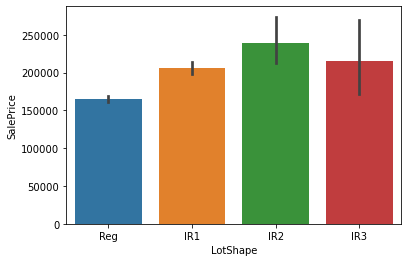

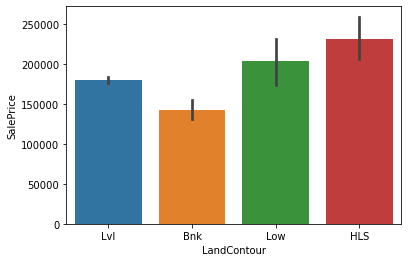

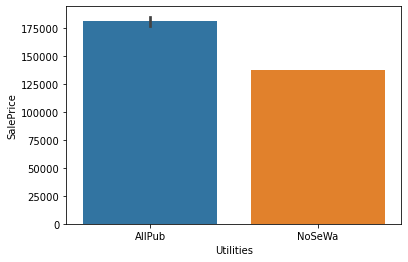

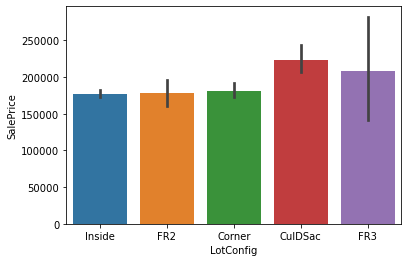

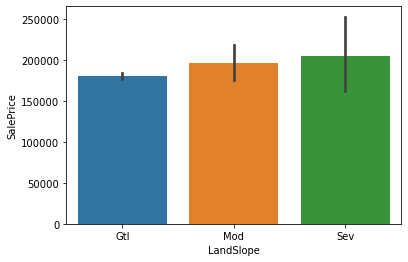

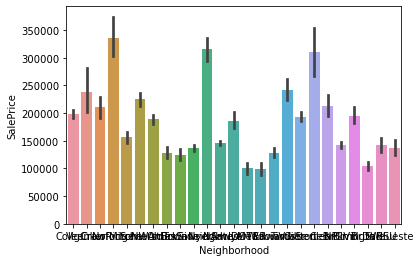

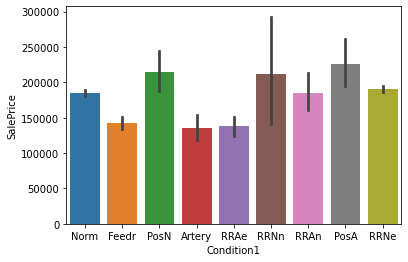

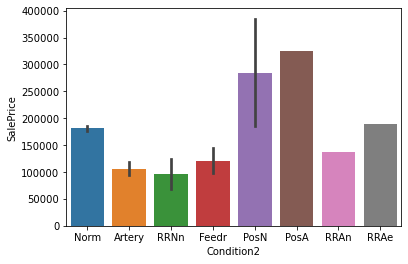

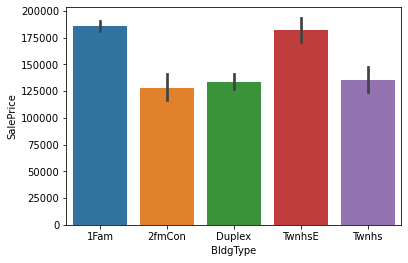

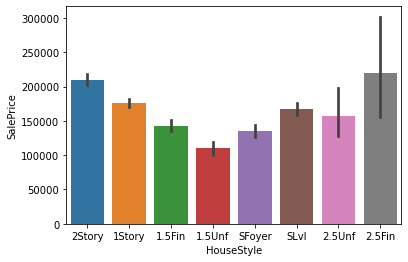

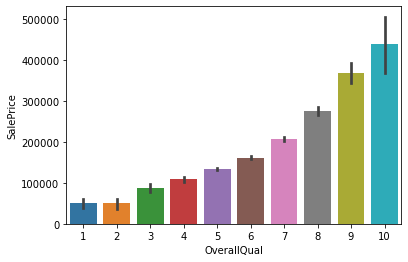

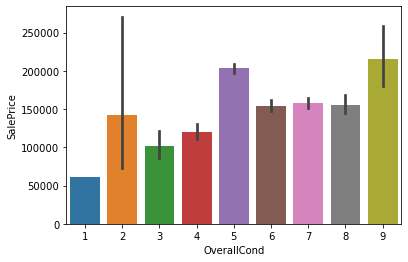

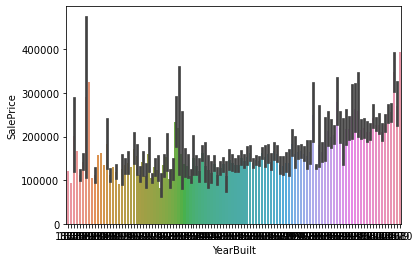

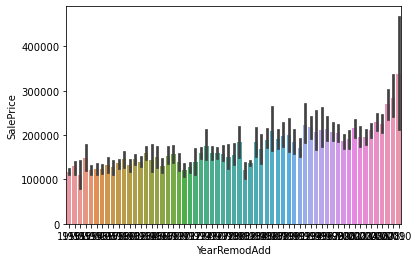

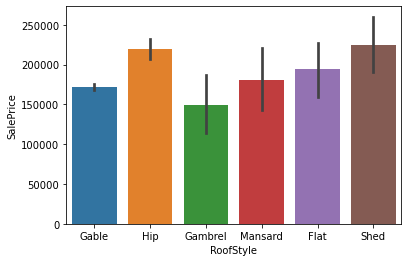

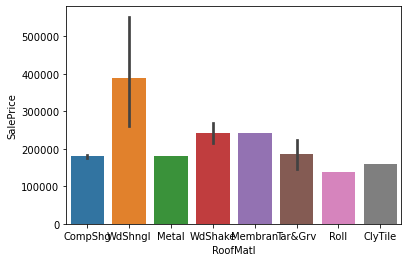

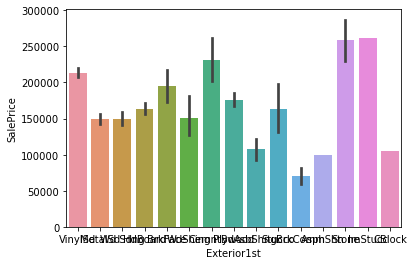

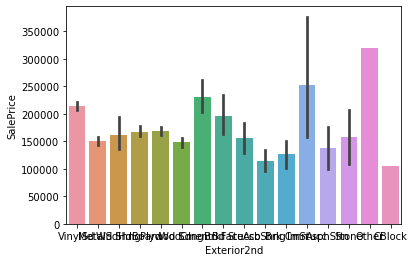

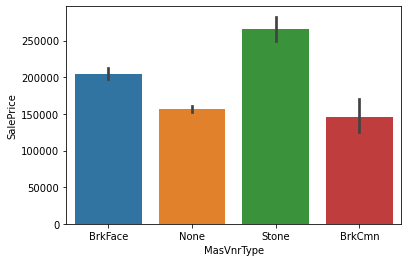

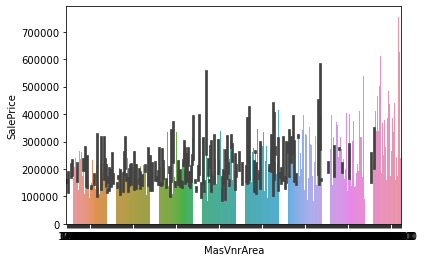

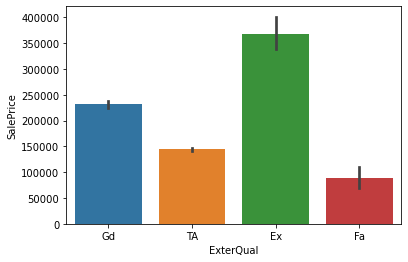

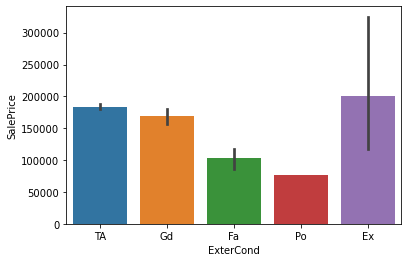

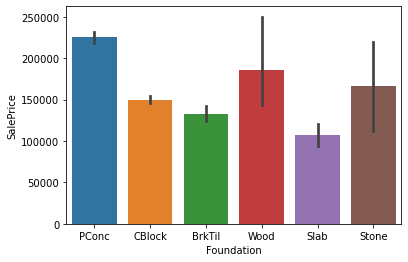

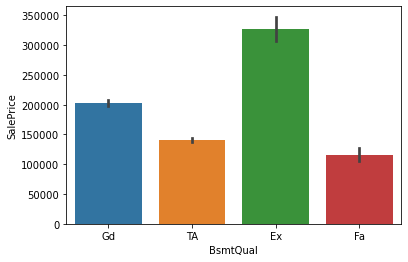

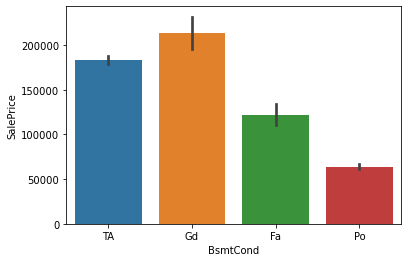

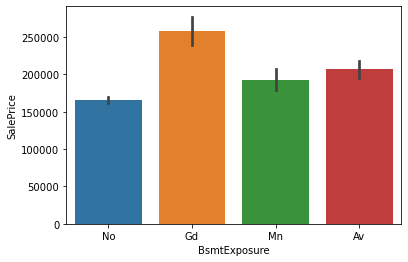

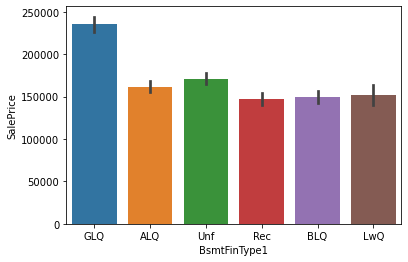

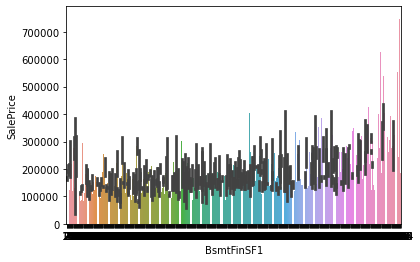

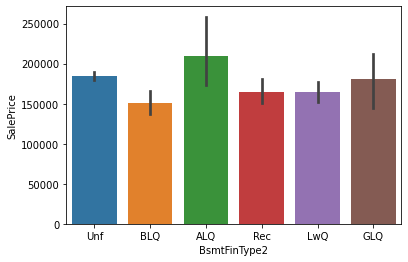

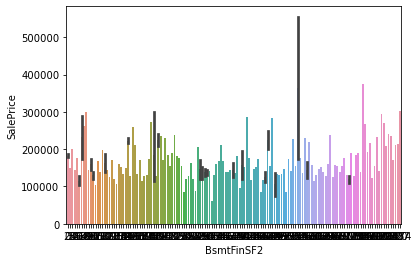

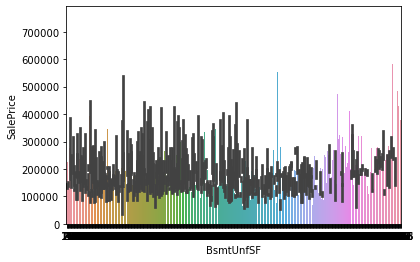

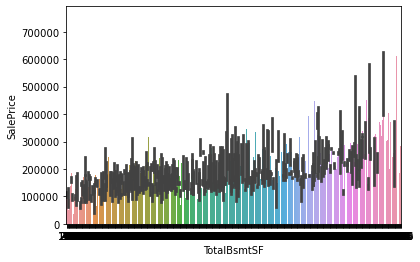

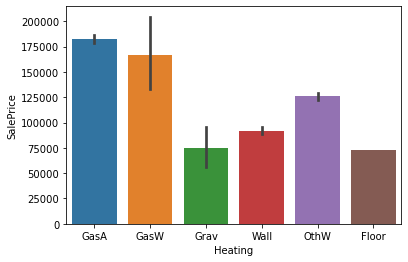

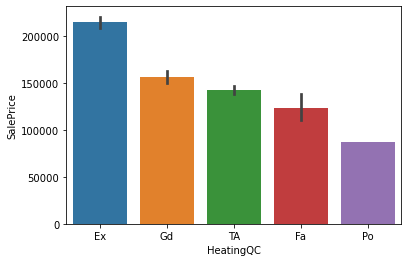

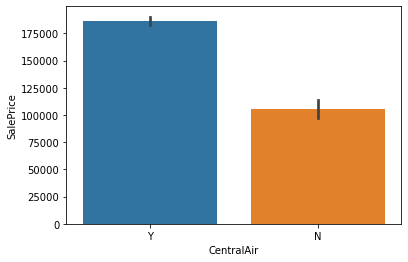

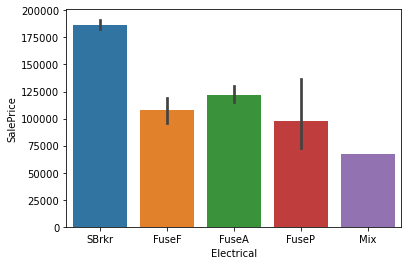

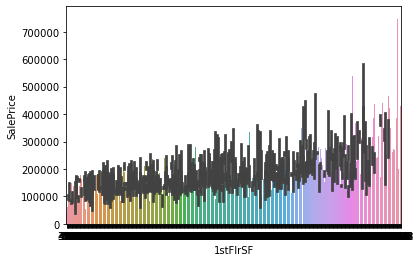

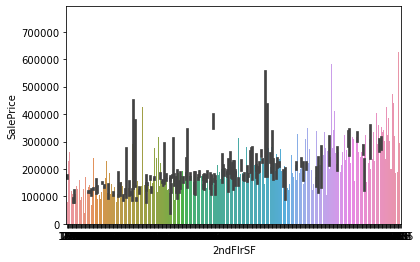

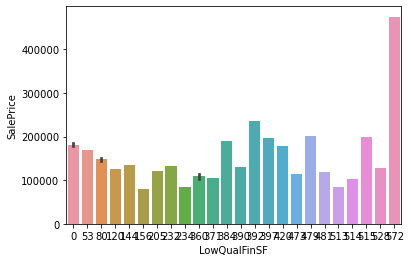

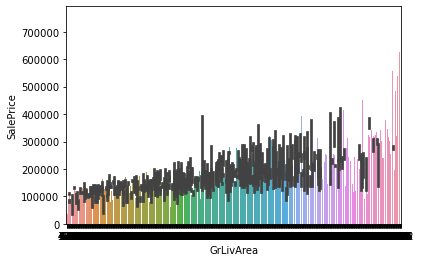

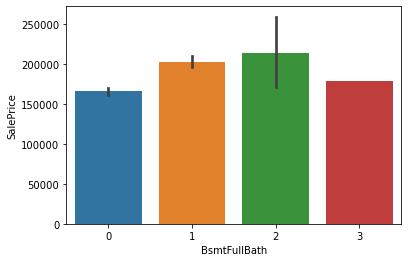

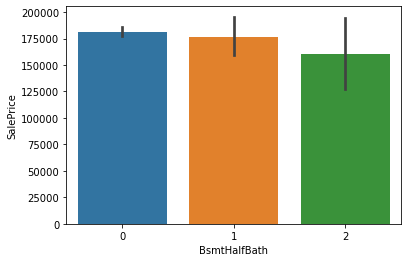

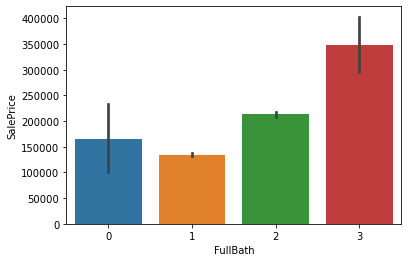

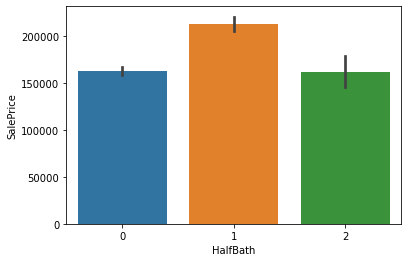

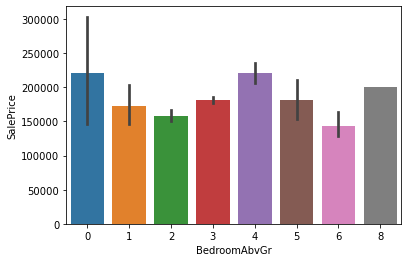

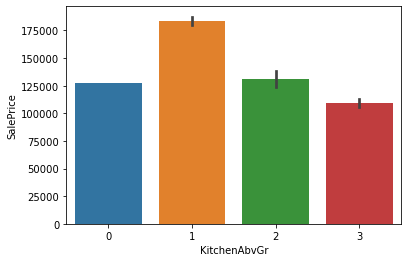

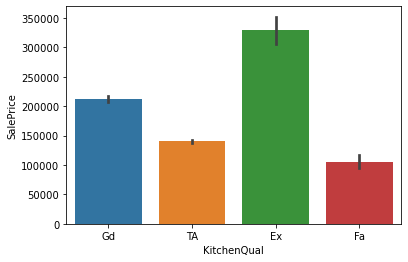

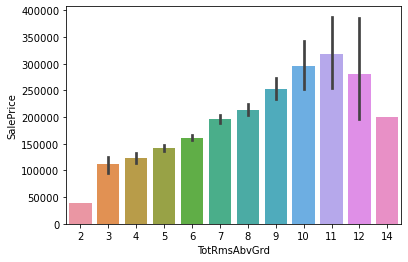

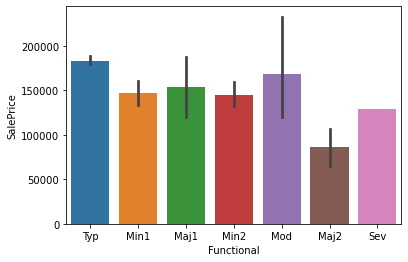

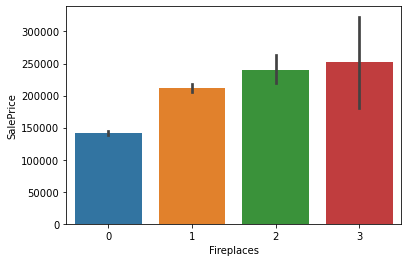

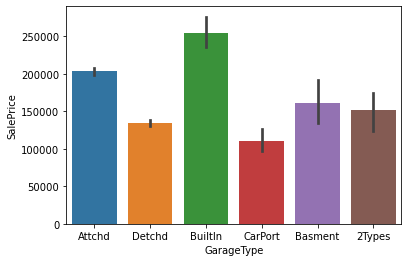

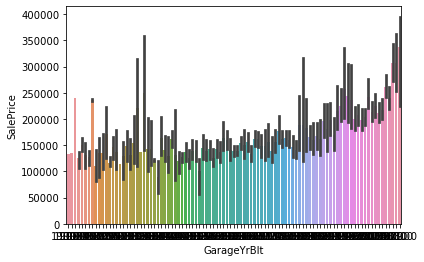

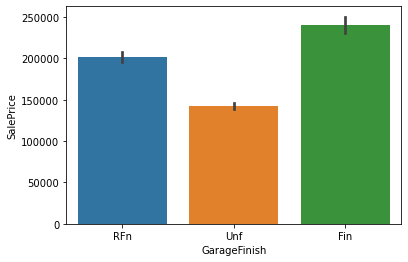

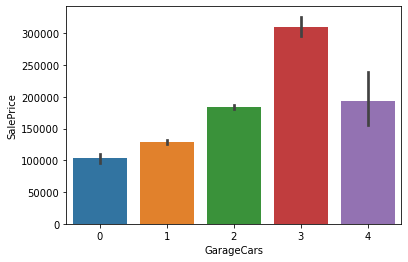

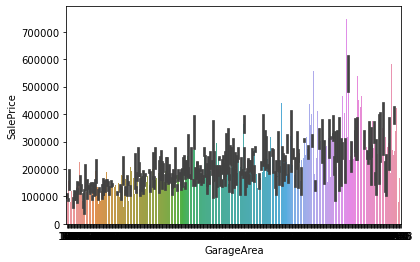

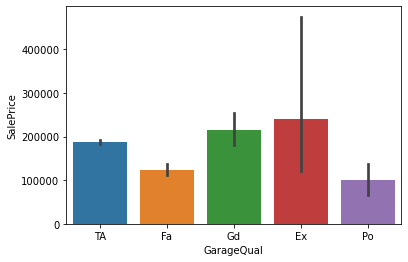

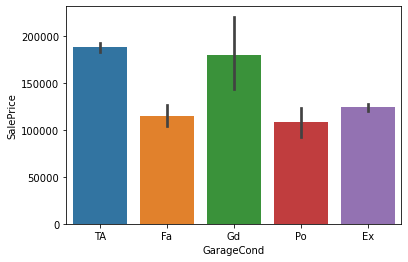

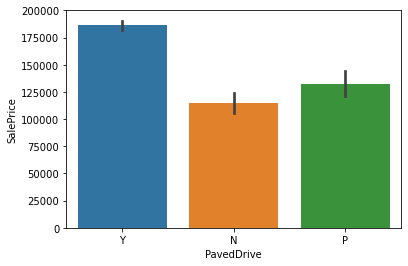

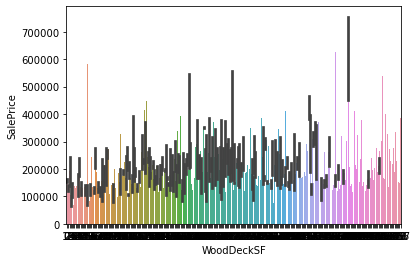

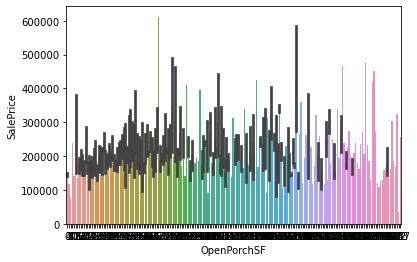

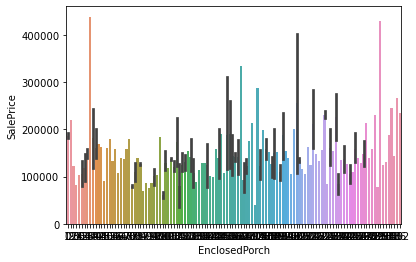

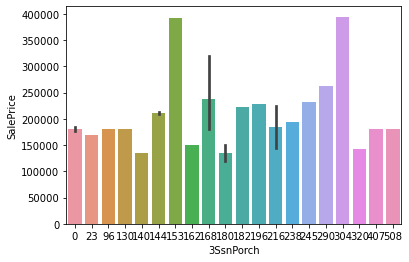

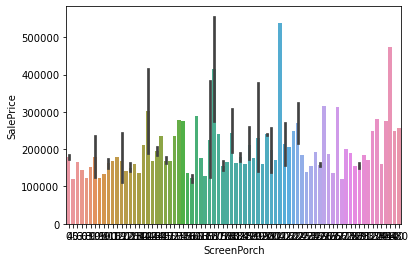

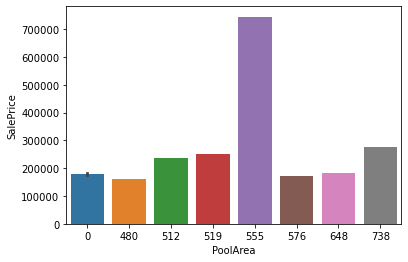

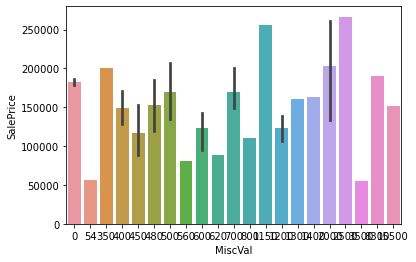

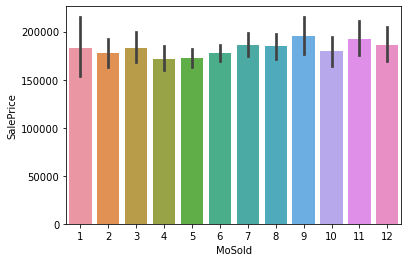

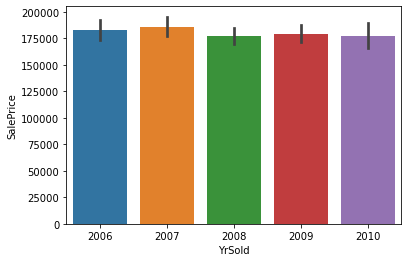

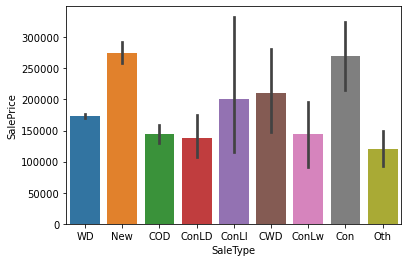

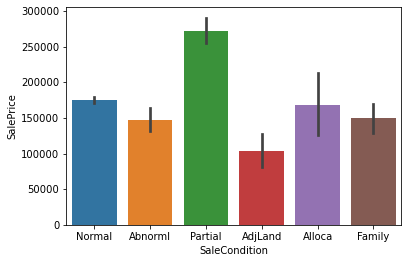

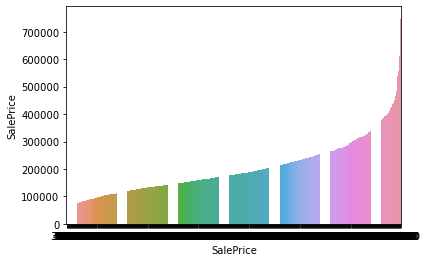

In [19]:
# create a plot SalePrice vs GrLivArea
# sns.barplot(data=a, x="OverallQual", y="SalePrice")
# plt.show()

#copy this plot with x = the other columns of the dataframe a and y = SalePrice

# for i in col:
# 	sns.barplot(data=a, x=i, y="SalePrice")
# 	plt.show()

#store them into a png file




In [17]:
a[a.columns[0]]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

### Détection de tendance ?


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

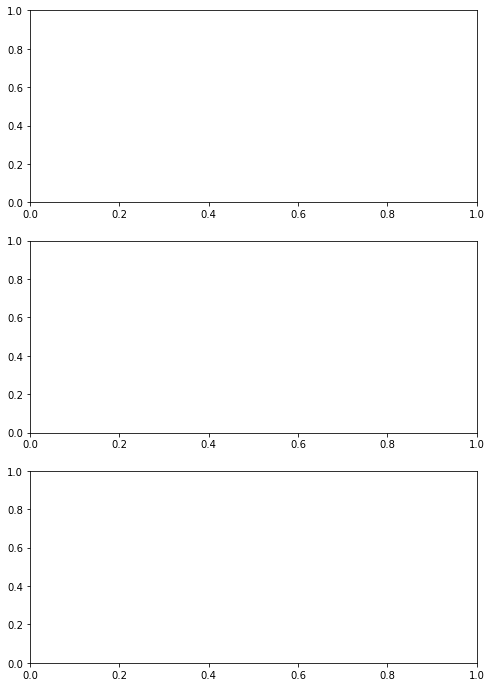

In [18]:
# create a graph to show SalePrice vs every other column

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
x = a['SalePrice']
# Iterate over the columns and create a separate plot for each one
for i, y in a.columns:
    axs[i].plot(x, y)
    axs[i].set_xlabel('X-axis label')
    axs[i].set_ylabel(f'Y{i+1}-axis label')
    axs[i].set_title(f'Plot {i+1}')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot

### Détection des outliers ?


In [ ]:
# detect outliers IQR for each column





### Détection des doublons ?


In [ ]:
# remove duplicates
a = a.drop_duplicates()
a

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Détection des valeurs nulles ?

In [ ]:
# find null values and replace them with the mean of the column


• Afin d'extraire des features des variables textuelles, il ne faut pas négliger la phase de nettoyage. Parmi les
étapes les plus importantes du nettoyage du texte :

 Enlever la ponctuation


Extraire les emojis


 Enlever les stopwords
Effectuer du stemming et/ou lemmatisation

Une fois cette phase de nettoyage effectuée, on peut passer à la phase d'embedding, qui peut se faire de différentes
manières:

Utilisation de bag-of-words

Utilisation de tf-idf

Utilisation d'un word2vec, doc2vec, glove

Utilisation de modèles pré-entrainés

In [ ]:
# for all columns with a type "object", remove punctuation and replace with a space. Then, replace all spaces with a single space
a = a.replace(r'[^\w\s]+', '', regex=True)
a = a.replace(r'\s+', ' ', regex=True)
a 

# we do not need to do these steps since it's not an NLP project.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
